In [1]:
import os
import pickle
import sys

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from snmachine import sndata
from snmachine.utils.plasticc_pipeline import get_directories, load_dataset

In [4]:
%config Completer.use_jedi = False  

In [5]:
%matplotlib inline

sns.set(font_scale=1.3, style="ticks")

In [6]:
folder_path = 'C:\\Users\\Alcatraz\\Desktop\\Supernova\\snmachine-main\\snmachine\\example_data'

In [7]:
data_file_name = 'example_dataset.pckl'

In [8]:
data_path = os.path.join(folder_path, data_file_name)
dataset = load_dataset(data_path)

Opening from binary pickle
Dataset loaded from pickle file as: <snmachine.sndata.PlasticcData object at 0x00000195DF264640>


In [9]:
obj_show = '7033'
obs_before = dataset.data[obj_show].to_pandas()

In [10]:
max_gap_length = 50

In [11]:
dataset.remove_gaps(max_gap_length*2, verbose=True)
dataset.remove_gaps(max_gap_length*2, verbose=True)
dataset.remove_gaps(max_gap_length, verbose=True)
dataset.remove_gaps(max_gap_length, verbose=True)
dataset.remove_gaps(max_gap_length, verbose=True)

The longest event is 74994691 and its length is 1090.99 days.
The longest event is 79641012 and its length is 879.68 days.
The longest event is 79333412 and its length is 629.56 days.
The longest event is 79333412 and its length is 271.56 days.
The longest event is 79333412 and its length is 271.56 days.


In [12]:
print(f'The longest processed light curve has {dataset.get_max_length():.2f} days.')

The longest processed light curve has 271.56 days.


In [13]:
folder_path_to_save = folder_path
file_name = data_file_name[:-5]+'_gapless50.pckl'
file_name

'example_dataset_gapless50.pckl'

In [14]:
with open(os.path.join(folder_path_to_save, file_name), 'wb') as f:
    pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)

In [15]:
obs_after = dataset.data[obj_show]

Text(0.5, 1.0, 'Before')

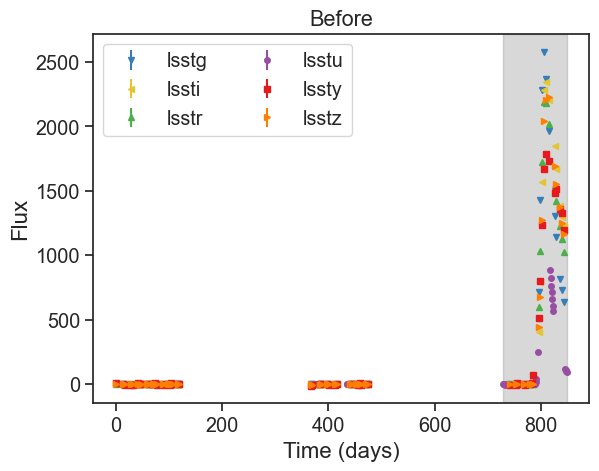

In [16]:
sndata.plot_lc(obs_before)
plt.axvspan(xmin=729, xmax=849, color='gray', alpha=.3)
plt.title('Before')

Text(0.5, 1.0, 'After')

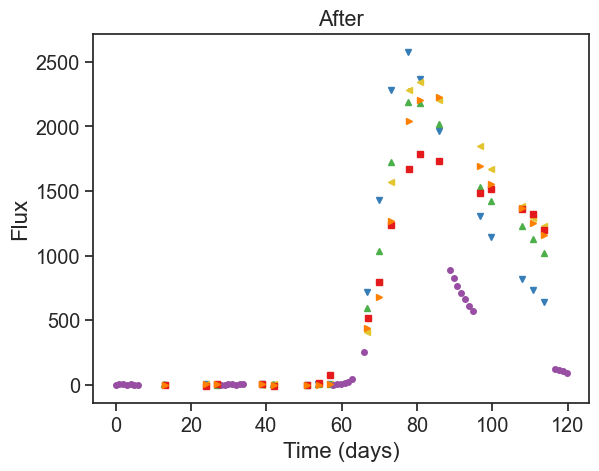

In [17]:
sndata.plot_lc(obs_after, False)
plt.title('After')